The code below provides a visual representation of how the Black-Scholes call option price changes with respect to time.

**a)** Use the visualization to interpret how the rate of change of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the rate of change of the Black-Scholes call option price depends on the spot price 

**c)** Repeat parts a and b for put option prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

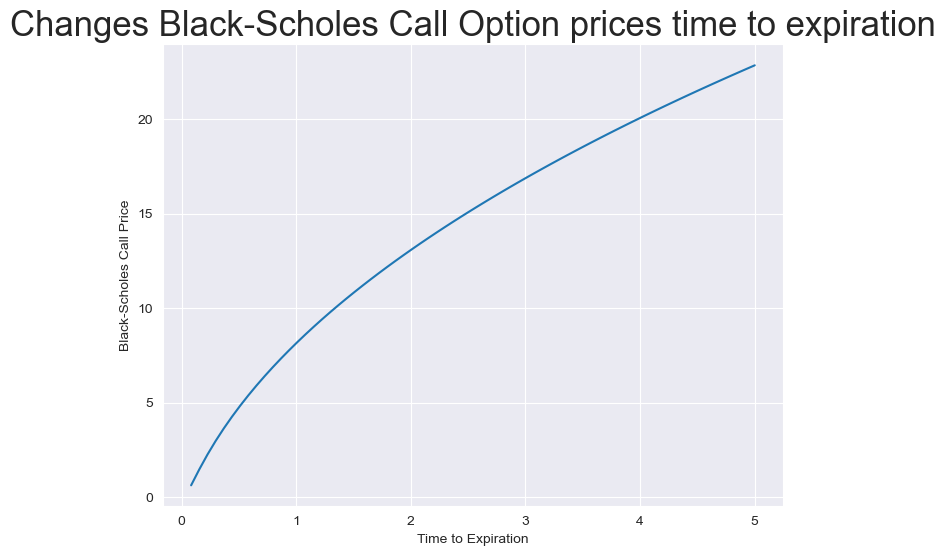

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (8,6))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

The plot obtained by running the code above shows how the price of a European call option (calculated using the Black-Scholes model) changes as the time to expiration increases. We could focus on the key observation below: 
The call option price increases as the time to expiration increases. This makes sense because: 
The call option:

More time = More opportunity for the underlying asset (S$_0$=100) to move above the strike price (K=110).
Time value decays as expiration approaches, but early on, the option has significant extrinsic value.

Rate of Change (Slope):
Steep at Short Expirations:

For very short times (e.g., < 0.5 years), the call price rises rapidly with small increases in time.
This reflects the high time sensitivity (Theta) of options near expiration. Small time changes have large impacts on pricing.
For longer times (e.g., > 2 years), the curve becomes less steep.
Additional time adds less marginal value because the probability of the asset reaching the strike price stabilizes.

As time to expiration tends towards infinity, the call price approaches S$_0$ (the current asset price = 100), discounted by the risk-free rate (r=0 in this case).

Intuition: With infinite time, the strike price (K=110) becomes negligible in present value terms, and the option behaves like owning the asset.

**Mathematical Intuition:**
The d$_1$ term in Black-Scholes includes (r + 0.5σ$_2$)t, so longer time (t) increases the probability of the call being in-the-money (norm.cdf(d$_1$)).
Theta (∂C/∂t): The rate of change of the option price concerning time is positive for calls (but decays as expiration lengthens).

Practical Implications:
Short-term options: Highly sensitive to time decay (Theta risk). Traders pay a premium for extra time.

Long-term options: Less sensitive to time changes; dominated by volatility and asset drift.

**Conclusion**
The call option price increases with time to expiration, but the rate of increase is nonlinear: steep for near-expiration dates and flatter for longer-dated options. This reflects the diminishing marginal value of additional time in options pricing.



### Create a separate graphic to visualize how the rate of change of the Black-Scholes call option price depends on the spot price S$_0$ Write a code for this one?

/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


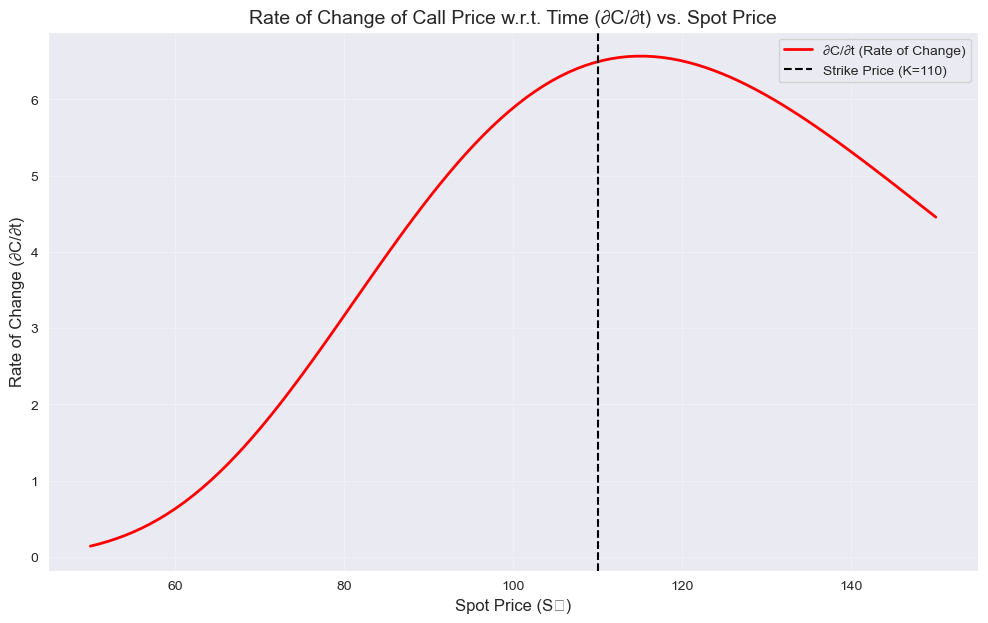

In [5]:
# Black-Scholes call price
def bs_call(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*t) / (sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1) - K*np.exp(-r*t)*norm.cdf(d2)

# Parameters
K = 110      
sigma = 0.3   
t = 1.0     
r = 0.0  

# Range of spot prices (S0)
S0_range = np.linspace(50, 150, 100)  # From deep Out of Money (OTM)  to deep  In the Money (ITM)

# Calculate call prices and their rate of change (∂C/∂t)
delta_t = 0.01  # Small time increment for numerical derivative
call_prices = [bs_call(S0, K, sigma, t) for S0 in S0_range]
call_prices_dt = [bs_call(S0, K, sigma, t + delta_t) for S0 in S0_range]
rate_of_change = (np.array(call_prices_dt) - np.array(call_prices)) / delta_t

plt.figure(figsize=(12, 7))
plt.plot(S0_range, rate_of_change, color='red', linewidth=2, label='∂C/∂t (Rate of Change)')
plt.axvline(x=K, color='black', linestyle='--', label=f'Strike Price (K={K})')
plt.xlabel('Spot Price (S₀)', fontsize=12)
plt.ylabel('Rate of Change (∂C/∂t)', fontsize=12)
plt.title('Rate of Change of Call Price w.r.t. Time (∂C/∂t) vs. Spot Price', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Key Insights from the Plot:
Deep Out-of-the-Money (OTM) Calls (S$_0$ << K):

The rate of change (∂C/∂t) is close to 0 because the option is unlikely to expire profitably, regardless of extra time.

At-the-Money (ATM) Calls (S$_0$ = K)

The rate of change is maximized because the time value is most sensitive here. Small changes in S$_0$ ot t significantly affect the probability of finishing ITM.

Deep In-the-Money (ITM) Calls (S$_0$ >> K)

The rate of change decreases because the call behaves like the underlying asset (intrinsic value dominates). Extra time adds little marginal value.

The plot will show:

A peak near S$_0$ = K, confirming that ATM options are most sensitive to time changes.

A symmetric decline as S$_0$ moves away from K.  K, reflecting diminishing time-value effects for deep ITM/OTM options.

**C)** Analysis for Put Options: Black-Scholes Price vs. Time and Spot Price
We’ll repeat the analysis for put options, focusing on:

How do the put price changes with time to expiration ( as discussed in question a).

How does the rate of change (∂P/∂t) of the put price vary with the spot price S$_0$ (as discussed in question b)?

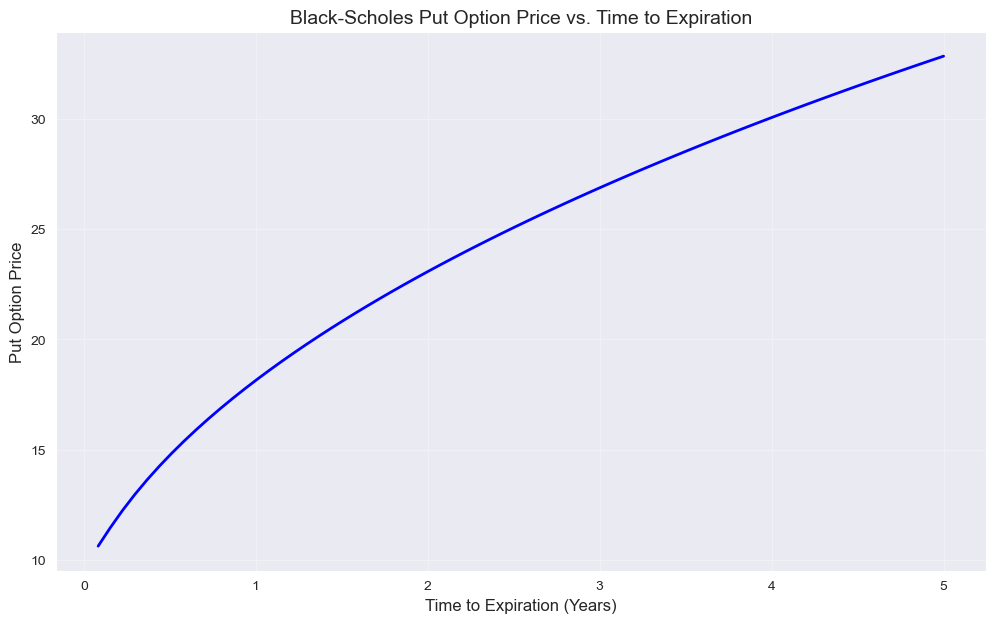

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes put price
def bs_put(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*t) / (sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return K*np.exp(-r*t)*norm.cdf(-d2) - S0*norm.cdf(-d1)

# Parameters
S0 = 100      
K = 110       
sigma = 0.3   
r = 0.0     
times = np.linspace(1/12, 5, 70)  # 1 month to 5 years

# Calculate put prices
put_prices = [bs_put(S0, K, sigma, t=t) for t in times]

plt.figure(figsize=(12, 7))
plt.plot(times, put_prices, color='blue', linewidth=2)
plt.title('Black-Scholes Put Option Price vs. Time to Expiration', fontsize=14)
plt.xlabel('Time to Expiration (Years)', fontsize=12)
plt.ylabel('Put Option Price', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

Interpretation:
General Trend: The put price increases with time to expiration, but the relationship is nonlinear.
Unlike calls, puts can have a negative rate of change (∂P/∂t) for deep ITM cases (see C.2).

Key Regions: Short Expirations: Rapid increase in price due to high time sensitivity (Theta).
Long Expirations: Curve flattens as marginal time value diminishes.

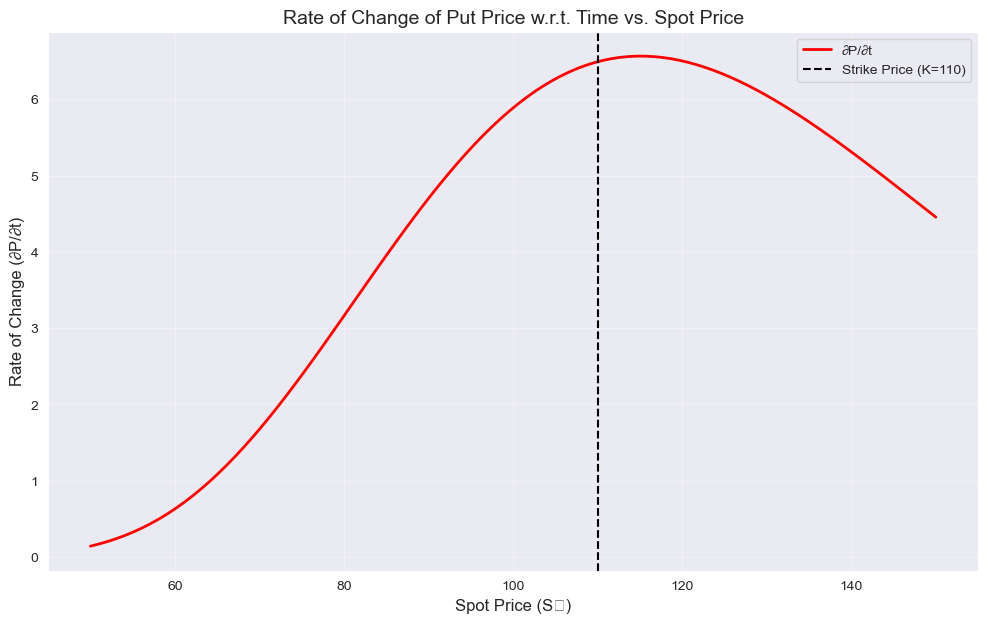

In [9]:
# Range of spot prices
S0_range = np.linspace(50, 150, 100)  # Deep OTM to deep ITM
t = 1.0  

# Numerical derivative of put price w.r.t. time
delta_t = 0.01
put_prices = [bs_put(S0, K, sigma, t) for S0 in S0_range]
put_prices_dt = [bs_put(S0, K, sigma, t + delta_t) for S0 in S0_range]
rate_of_change = (np.array(put_prices_dt) - np.array(put_prices)) / delta_t

plt.figure(figsize=(12, 7))
plt.plot(S0_range, rate_of_change, color='red', linewidth=2, label='∂P/∂t')
plt.axvline(x=K, color='black', linestyle='--', label=f'Strike Price (K={K})')
plt.xlabel('Spot Price (S₀)', fontsize=12)
plt.ylabel('Rate of Change (∂P/∂t)', fontsize=12)
plt.title('Rate of Change of Put Price w.r.t. Time vs. Spot Price', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

***Interpreation:***

***Deep ITM Puts (S$_0$ << K)***
Negative ∂P/∂t: Extra time reduces the put price because the option is already almost certain to expire ITM. The present value of 
K decreases with more time.

***ATM Puts (S$_0$ = K):***
Peak ∂P/∂t: Maximum sensitivity to time (similar to calls).

***Deep OTM Puts (S$_0$ >> K):***
∂P/∂t ≈ 0: The put is almost worthless, and extra time adds minimal value.

Put prices generally increase with time, but deep ITM puts may see a negative rate of change due to discounting effects.

The rate of change (∂P/∂t) is most sensitive for ATM puts and declines (or turns negative) as from K.

## d) Use the space below to record your observations and reflections based on the generated plots.

***Call Option – Time Sensitivity***
The call option price increases as time to expiration increases, but the rate of change (∂C/∂t) is nonlinear.

Short-term expirations (< 0.5 years): The call price is highly sensitive to time, increasing rapidly due to the significant extrinsic value.

Long-term expirations (> 2 years): The rate of change slows, approaching an asymptote (the call price converges toward the spot price S$_0$ when r = 0).

Economic Intuition: More time allows more opportunities for the asset to exceed the strike price, increasing the call’s value. However, the marginal benefit of additional time diminishes.

***Call Option – Spot Price Sensitivity (∂C/∂t vs. S$_0$)***
The rate of change (∂C/∂t) peaks when the option is at-the-money (S$_0$ = K) and declines as the spot price moves away from the strike.

Key Point:

Deep OTM (S$_0$ << K): ∂C/∂t = 0 (the call is almost worthless regardless of time).

ATM (S$_0$ = K): Maximum sensitivity—small changes in time significantly impact pricing.

Deep ITM (S$_0$ >> K): ∂C/∂t decreases because the call behaves like the underlying asset (intrinsic value dominates).

Practical Implication: Traders pay the most for time value in ATM options.

***Put Option – Time Sensitivity***
The put price generally increases with time, but deep ITM puts can exhibit a negative ∂P/∂t.

Key point:

Short-term expirations: Rapid price increase due to high time-value sensitivity.

Long-term expirations: Curve flattens, similar to calls.

Deep ITM (S$_0$ << K): ∂P/∂t can be negative because the present value of K decreases with more time (discounting effect).

Economic Intuition: For deep ITM puts, the certainty of exercise means extra time reduces the option’s value due to the time value of money.

***Put Option – Spot Price Sensitivity (∂P/∂t vs. S$_0$)***
The rate of change (∂P/∂t) is positive for OTM/ATM puts but negative for deep ITM puts.

Key Insights:

Deep OTM (S$_0$ >> K): ∂P/∂t = 0 (the put is nearly worthless).

ATM (S$_0$ = K): Maximum sensitivity—time has the strongest impact.

Deep ITM (S$_0$ = K): ∂P/∂t < 0 (longer time reduces the put’s value).

Economic Implication: Deep ITM puts lose value with more time, unlike calls.
